# <b> Laboratório 8

Aluno: Rafael Mendes Campello

Referência: https://ecee.colorado.edu/~mathys/ecen4652/lab08/

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
from importlib import reload
from Resources import comsig
import bisect
import ModuleLab1
import ModuleLab2
import ModuleLab4
import ModuleLab5
import ModuleLab6
import ModuleLab7
import ModuleLab8
reload(ModuleLab1)
reload(ModuleLab2)
reload(ModuleLab4)
reload(ModuleLab5)
reload(ModuleLab6)
reload(ModuleLab7)
reload(ModuleLab8)

<module 'ModuleLab8' from '/home/rcampello/Main/3m/Simulação de sistemas de comunicação/Labs/Lab8/ModuleLab8.py'>

# E1

## a

Implementação e teste conforme sugerido.

In [2]:
reload(ModuleLab8)

<module 'ModuleLab8' from '/home/rcampello/Main/3m/Simulação de sistemas de comunicação/Labs/Lab8/ModuleLab8.py'>

In [3]:
Fs = 44100
FB = 100
fc = 300
sig_an = comsig.sigSequ(np.random.randint(0, 2, 10), FB)

Para a transmissão coerente:

In [4]:
sig_xt, sig_st = ModuleLab8.askxmtr(sig_an, Fs, 'rect', [], 'coh', [fc, 0])

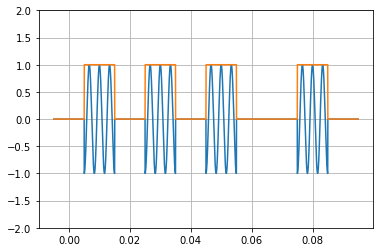

In [5]:
plt.ylim([-2, 2])
plt.grid()
plt.plot(sig_xt.timeAxis(), sig_xt.signal())
plt.plot(sig_st.timeAxis(), sig_st.signal())

Para a transmissão não-coerente:

In [6]:
sig_an = comsig.sigSequ([np.random.randint(0, 2, 10), 360 * np.random.rand(10)], FB)

In [7]:
sig_an.signal()

array([[  1.        ,   0.        ,   1.        ,   0.        ,
          1.        ,   0.        ,   1.        ,   0.        ,
          0.        ,   1.        ],
       [293.30383332, 137.41166413, 138.72650605, 144.28038269,
         51.33071282, 202.28563377,  39.15123407, 243.92162659,
        240.83844697, 335.33775101]])

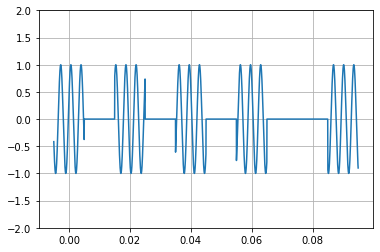

In [8]:
sig_xt, sig_st = ModuleLab8.askxmtr(sig_an, Fs, 'rect', [], 'noncoh', [fc])
plt.ylim([-2, 2])
plt.grid()
plt.plot(sig_xt.timeAxis(), sig_xt.signal())

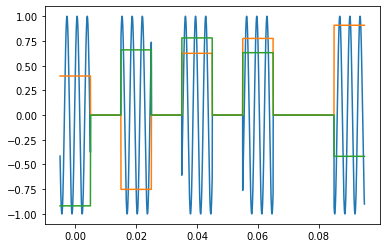

In [9]:
plt.plot(sig_xt.timeAxis(), sig_xt.signal())
plt.plot(sig_st.timeAxis(), sig_st.signal().real)
plt.plot(sig_st.timeAxis(), sig_st.signal().imag)

O comportamento é conforme o esperado. Para a transmissão coerente, não há derivada descontinua entre dois símbolos '1' consecutivos, na não-coerente, há.

## b

In [138]:
reload(ModuleLab8)

<module 'ModuleLab8' from '/home/rcampello/Main/3m/Simulação de sistemas de comunicação/Labs/Lab8/ModuleLab8.py'>

Para transmissão coerente:

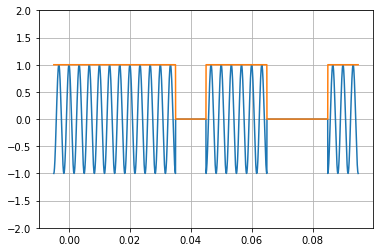

In [139]:
Fs = 44100
FB = 100
fc = 300
sig_an = comsig.sigSequ(np.random.randint(0, 2, 10), FB)


sig_xt, sig_st = ModuleLab8.askxmtr(sig_an, Fs, 'rect', [], 'coh', [fc, 0])
plt.ylim([-2, 2])
plt.grid()
plt.plot(sig_xt.timeAxis(), sig_xt.signal())
plt.plot(sig_st.timeAxis(), sig_st.signal())

In [140]:
sig_bn, sig_bt, sig_wt, ixn = ModuleLab8.askrcvr(sig_xt, 'coh', [fc, 0], [FB, 0], 'rect', [])

In [141]:
errors = sum(sig_an.signal() - sig_bn.signal() > 0.01)
print(errors)

0


O plot abaixo mostra o sinal recebido, o sinal PAM após o filtro casado e os instantes de amostragem. Acima vimos que a implementação do receptor consegue recuperar o sinal.

<StemContainer object of 3 artists>

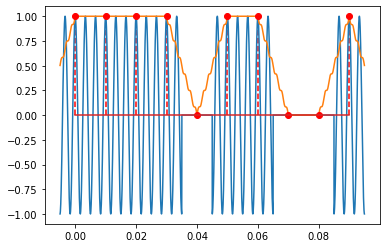

In [142]:
plt.plot(sig_xt.timeAxis(), sig_xt.signal())
plt.plot(sig_bt.timeAxis(), sig_bt.signal())
plt.stem(sig_bt.timeAxis()[ixn], sig_bt.signal()[ixn], linefmt="r--", markerfmt="ro")

Para transmissão não-coerente:

In [143]:
sig_an = comsig.sigSequ([np.random.randint(0, 2, 10), 360 * np.random.rand(10)], FB)

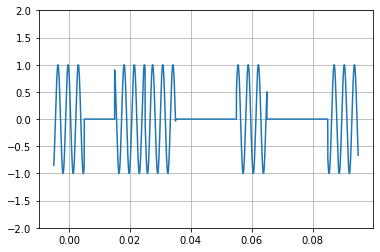

In [144]:
sig_xt, sig_st = ModuleLab8.askxmtr(sig_an, Fs, 'rect', [], 'noncoh', [fc])
plt.ylim([-2, 2])
plt.grid()
plt.plot(sig_xt.timeAxis(), sig_xt.signal())

In [145]:
sig_bn, sig_bt, sig_wt, ixn = ModuleLab8.askrcvr(sig_xt, 'noncoh', [fc], [FB, 0.0], 'rect', [])

In [146]:
errors = sum(sig_an.signal()[0] - sig_bn.signal() > 0.01)
print(errors)

0


<StemContainer object of 3 artists>

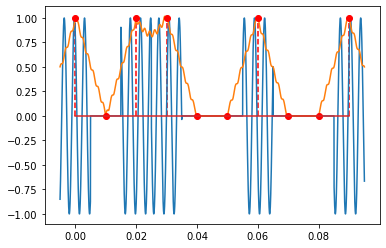

In [147]:
plt.plot(sig_xt.timeAxis(), sig_xt.signal())
plt.plot(sig_bt.timeAxis(), sig_bt.signal())
plt.stem(sig_bt.timeAxis()[ixn], sig_bt.signal()[ixn], linefmt="r--", markerfmt="ro")

Novamente, o receptor consegue decodificar sem erros.

## c

In [96]:
Fs = 44100
FB = 100
fc = 2100
sig_an = comsig.sigSequ(np.random.randint(0, 2, FB * 2), FB)

### i) OOK coerente

#### Pulso rect

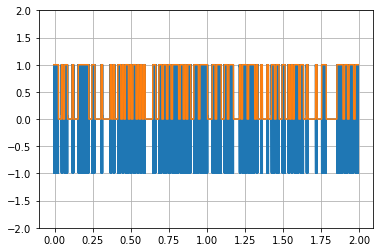

In [97]:
sig_xt, sig_st = ModuleLab8.askxmtr(sig_an, Fs, 'rect', [], 'coh', [fc, 0])
plt.ylim([-2, 2])
plt.grid()
plt.plot(sig_xt.timeAxis(), sig_xt.signal())
plt.plot(sig_st.timeAxis(), sig_st.signal())

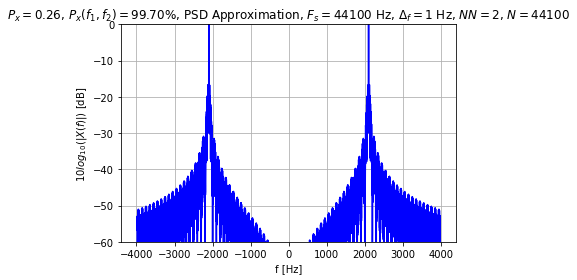

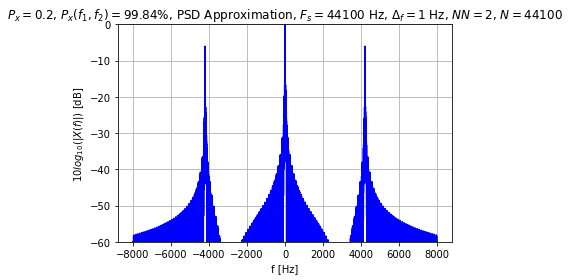

In [98]:
_, _ = ModuleLab5.showpsd(sig_xt, [-4000, 4000, -60], Fs)
_, _ = ModuleLab5.showpsd(sig_xt.pwrx(2), [-8000, 8000, -60], Fs)

OBS: Embora o gráfico acima pareça diferente do fornecido no material teórico, os parâmetros são diferentes ($f_c$), que modifica a PSD.

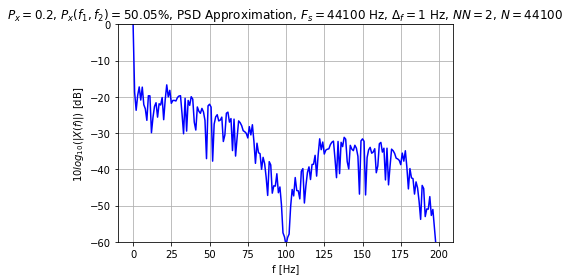

In [100]:
_, _ = ModuleLab5.showpsd(sig_xt.pwrx(2), [0, 200, -60], Fs)

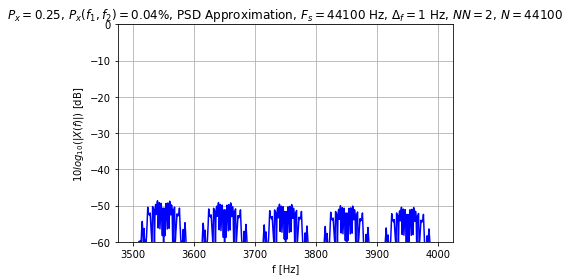

In [80]:
_, _ = ModuleLab5.showpsd(sig_xt, [3500, 4000, -60], Fs)

Neste caso, podemos encontrar o $F_B$ olhando para os zeros da PSD

In [23]:
sig_bn, sig_bt, sig_wt, ixn = ModuleLab8.askrcvr(sig_xt, 'coh', [fc, 0], [FB, 0], 'rect', [])
wn = sig_wt.signal()[ixn]

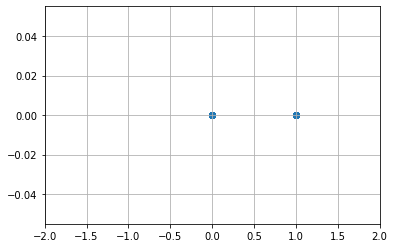

In [24]:
plt.xlim([-2, 2])
plt.grid()
plt.scatter(wn.real, wn.imag)

### Pulse tri

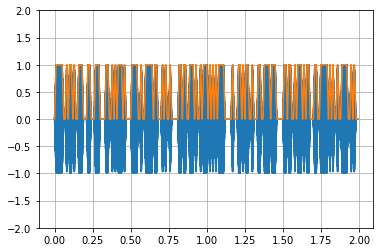

In [25]:
sig_xt, sig_st = ModuleLab8.askxmtr(sig_an, Fs, 'tri', [], 'coh', [fc, 0])
plt.ylim([-2, 2])
plt.grid()
plt.plot(sig_xt.timeAxis(), sig_xt.signal())
plt.plot(sig_st.timeAxis(), sig_st.signal())

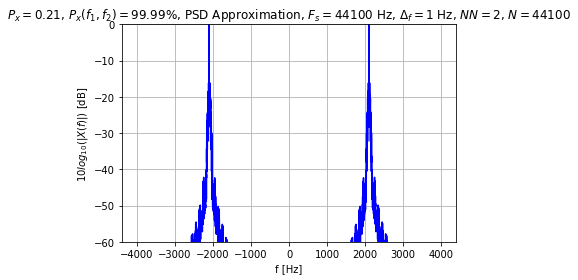

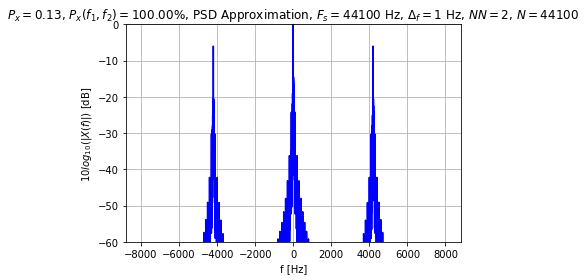

In [26]:
_, _ = ModuleLab5.showpsd(sig_xt, [-4000, 4000, -60], Fs)
_, _ = ModuleLab5.showpsd(sig_xt.pwrx(2), [-8000, 8000, -60], Fs)

Claramente o uso de banda diminuiu comparado ao OOK coerente com pulso retangular.

In [27]:
sig_bn, sig_bt, sig_wt, ixn = ModuleLab8.askrcvr(sig_xt, 'coh', [fc, 0], [FB, 0], 'tri', [])
wn = sig_wt.signal()[ixn]

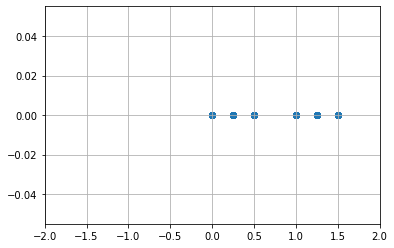

In [28]:
plt.xlim([-2, 2])
plt.grid()
plt.scatter(wn.real, wn.imag)

### ii) OOK Não-coerente

In [29]:
sig_an = comsig.sigSequ([np.random.randint(0, 2, FB * 2), 360 * np.random.rand(FB * 2)], FB)

#### Pulso rect

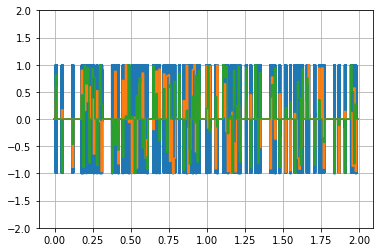

In [30]:
sig_xt, sig_st = ModuleLab8.askxmtr(sig_an, Fs, 'rect', [], 'noncoh', [fc])
plt.ylim([-2, 2])
plt.grid()
plt.plot(sig_xt.timeAxis(), sig_xt.signal())
plt.plot(sig_st.timeAxis(), sig_st.signal().real)
plt.plot(sig_st.timeAxis(), sig_st.signal().imag)

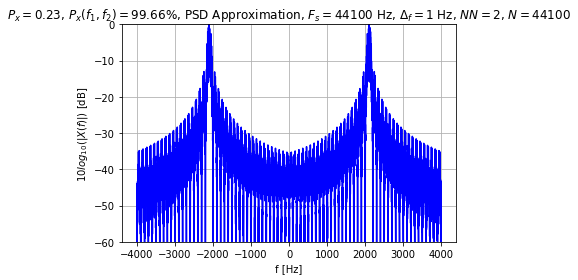

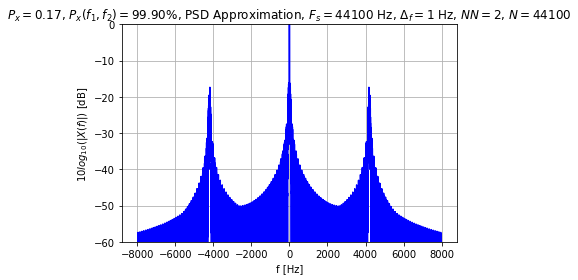

In [31]:
_, _ = ModuleLab5.showpsd(sig_xt, [-4000, 4000, -60], Fs)
_, _ = ModuleLab5.showpsd(sig_xt.pwrx(2), [-8000, 8000, -60], Fs)

In [32]:
sig_bn, sig_bt, sig_wt, ixn = ModuleLab8.askrcvr(sig_xt, 'noncoh', [fc, 0], [FB, 0.0], 'rect', [])
wn = sig_wt.signal()[ixn]

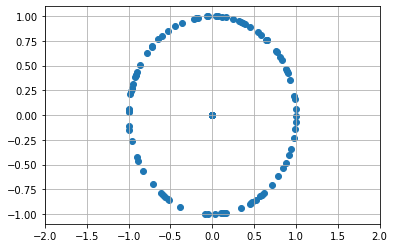

In [33]:
plt.xlim([-2, 2])
plt.grid()
plt.scatter(wn.real, wn.imag)

Temos um maior uso de banda devido às transições frequentes e o plot da constelação "gira" devido a fase aleatória, o ponto na origem indica a transmissão dos símbolos zero.

#### Pulso tri

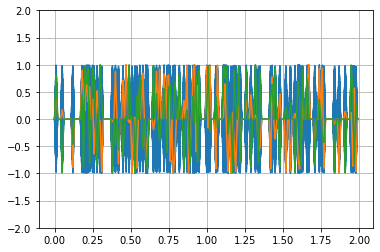

In [34]:
sig_xt, sig_st = ModuleLab8.askxmtr(sig_an, Fs, 'tri', [], 'noncoh', [fc])
plt.ylim([-2, 2])
plt.grid()
plt.plot(sig_xt.timeAxis(), sig_xt.signal())
plt.plot(sig_st.timeAxis(), sig_st.signal().real)
plt.plot(sig_st.timeAxis(), sig_st.signal().imag)

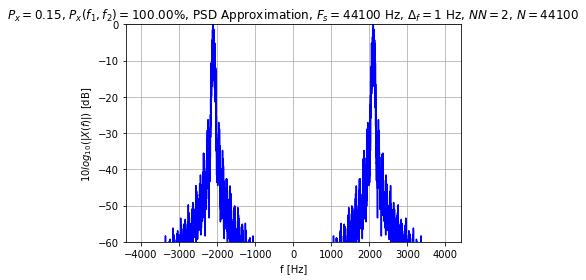

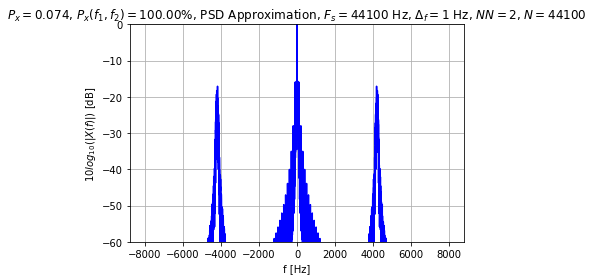

In [35]:
_, _ = ModuleLab5.showpsd(sig_xt, [-4000, 4000, -60], Fs)
_, _ = ModuleLab5.showpsd(sig_xt.pwrx(2), [-8000, 8000, -60], Fs)

In [36]:
sig_bn, sig_bt, sig_wt, ixn = ModuleLab8.askrcvr(sig_xt, 'noncoh', [fc, 0], [FB, 0.0], 'tri', [])
wn = sig_wt.signal()[ixn]

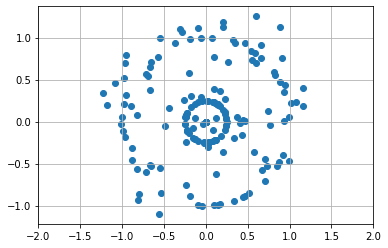

In [37]:
plt.xlim([-2, 2])
plt.grid()
plt.scatter(wn.real, wn.imag)

Novamente, a banda é reduzida pelo uso do pulso triangular e temos uma rotação da constelação.

### iii) BPSK

#### Pulso rect

In [38]:
vec = np.random.randint(0, 2, FB * 2)
sig_an = comsig.sigSequ(1 - 2 * vec, FB)

In [39]:
sig_xt, sig_st = ModuleLab8.askxmtr(sig_an, Fs, 'rect', [], 'coh', [fc, 0])

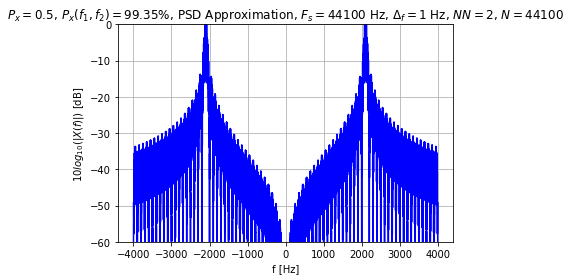

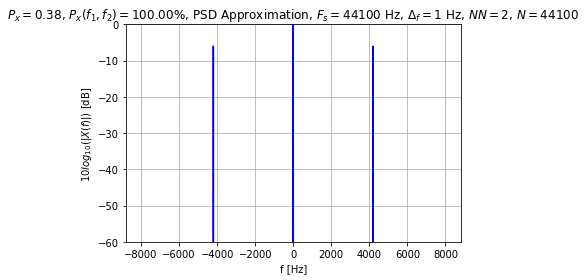

In [40]:
_, _ = ModuleLab5.showpsd(sig_xt, [-4000, 4000, -60], Fs)
_, _ = ModuleLab5.showpsd(sig_xt.pwrx(2), [-8000, 8000, -60], Fs)

In [41]:
sig_bn, sig_bt, sig_wt, ixn = ModuleLab8.askrcvr(sig_xt, 'coh', [fc, 0], [FB, 0], 'rect', [])
wn = sig_wt.signal()[ixn]

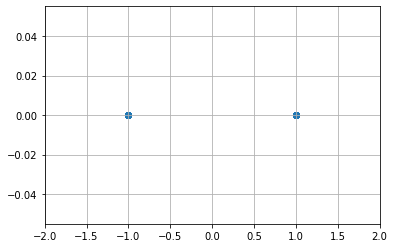

In [42]:
plt.xlim([-2, 2])
plt.grid()
plt.scatter(wn.real, wn.imag)

#### Pulso tri

In [43]:
sig_xt, sig_st = ModuleLab8.askxmtr(sig_an, Fs, 'tri', [], 'coh', [fc, 0])

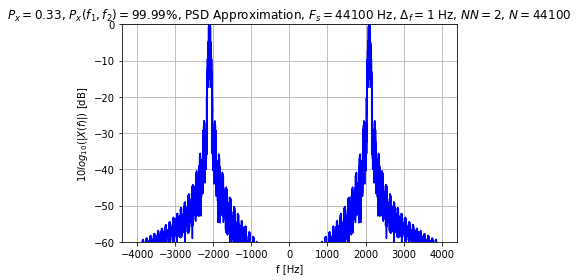

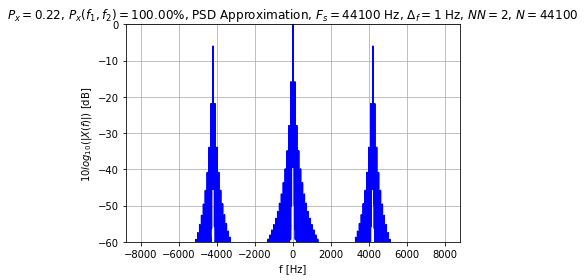

In [44]:
_, _ = ModuleLab5.showpsd(sig_xt, [-4000, 4000, -60], Fs)
_, _ = ModuleLab5.showpsd(sig_xt.pwrx(2), [-8000, 8000, -60], Fs)

In [45]:
sig_bn, sig_bt, sig_wt, ixn = ModuleLab8.askrcvr(sig_xt, 'coh', [fc, 0], [FB, 0], 'tri', [])
wn = sig_wt.signal()[ixn]

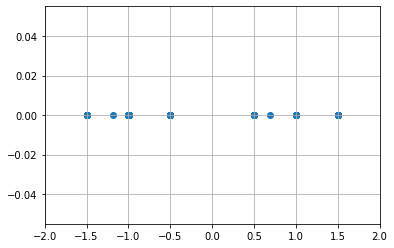

In [46]:
plt.xlim([-2, 2])
plt.grid()
plt.scatter(wn.real, wn.imag)

De maneira análoga aos resultados anteriores, a aplicação do pulso triangular faz com que apareçam pontos "intermediários" com relação à constelação em que é utilizada o pulso retangular.

## d

Como sempre, usamos a PSD para obter informações relevantes a respeito do sinal: $f_c$ e $F_B$.

### asksig801.wav

In [620]:
Fs, rt = ModuleLab1.wavread("Files/asksig801.wav")

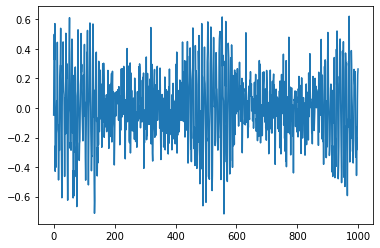

In [621]:
plt.plot(rt[:1000])

In [622]:
sig = comsig.sigWave(rt, Fs)

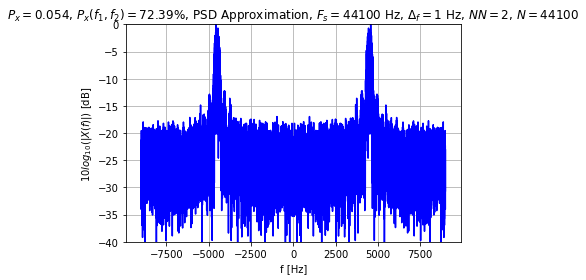

In [623]:
B = 9000
_ , _ = ModuleLab5.showpsd(sig, [-B, B, -40], Fs)

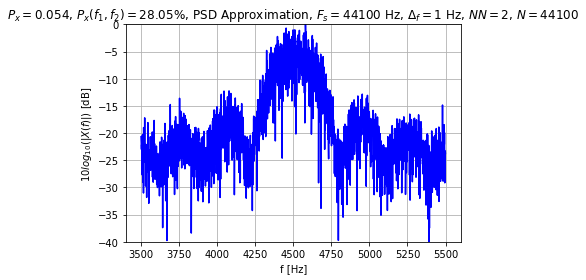

In [624]:
_ , _ = ModuleLab5.showpsd(sig, [3500, 5500, -40], Fs)

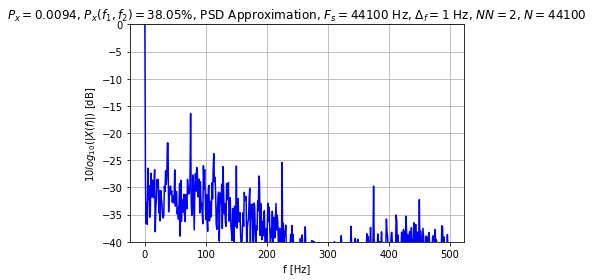

In [625]:
_ , _ = ModuleLab5.showpsd(sig.pwrx(2), [0, 500, -40], Fs)

In [626]:
sig_bn, sig_bt, sig_wt, ixn = ModuleLab8.askrcvr(sig, 'noncoh', [4500], [300, 0.5], 'tri', [])

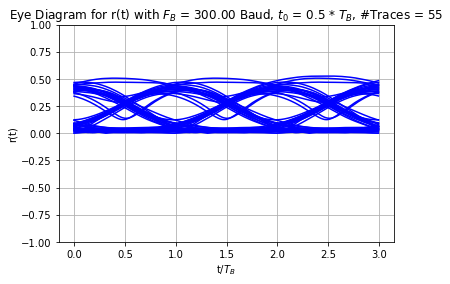

In [627]:
ModuleLab4.showeye(sig_bt, 300, 55, [0.5, 3, -1, 1])

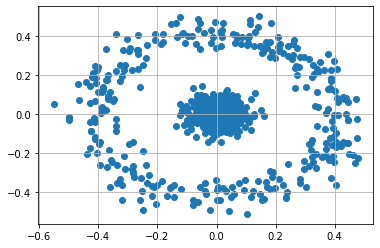

In [628]:
wn = sig_wt.signal()[ixn]
plt.grid()
plt.scatter(wn.real, wn.imag)

(array([179., 206.,  30.,   1.,   0.,   4.,  77., 141.,  71.,  19.]),
 array([0.00210363, 0.05721179, 0.11231995, 0.16742811, 0.22253627,
        0.27764443, 0.33275259, 0.38786075, 0.44296891, 0.49807707,
        0.55318523]),
 <BarContainer object of 10 artists>)

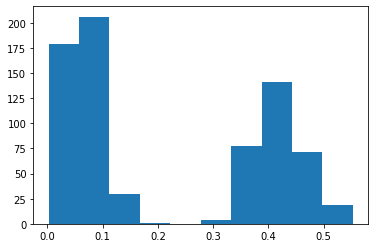

In [629]:
plt.hist(sig_bn.signal())

In [630]:
ModuleLab1.bin2asc(np.where(sig_bn.signal() > 0.2, 1, 0), flg = 0)

'If the Secret Service finds shredded paper in your trash, they WILL piece it back together!'

### asksig802.wav

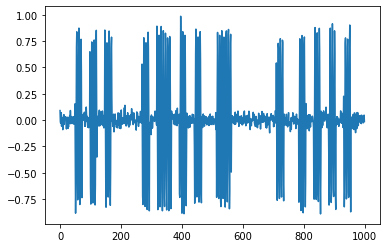

In [638]:
Fs, rt = ModuleLab1.wavread("Files/asksig802.wav")
plt.plot(rt[:1000])
sig = comsig.sigWave(rt, Fs)

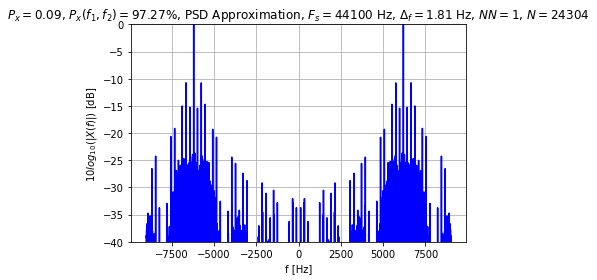

In [639]:
B = 9000
_ , _ = ModuleLab5.showpsd(sig, [-B, B, -40], Fs)

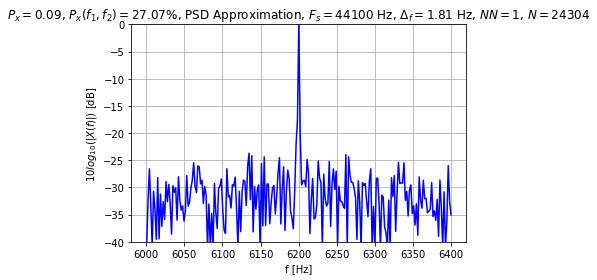

In [640]:
_ , _ = ModuleLab5.showpsd(sig, [6000, 6400, -40], Fs)

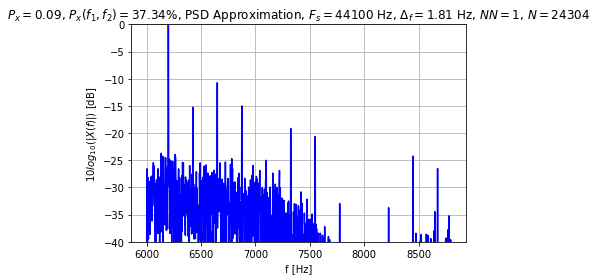

In [641]:
_ , _ = ModuleLab5.showpsd(sig, [6000, 8800, -40], Fs)

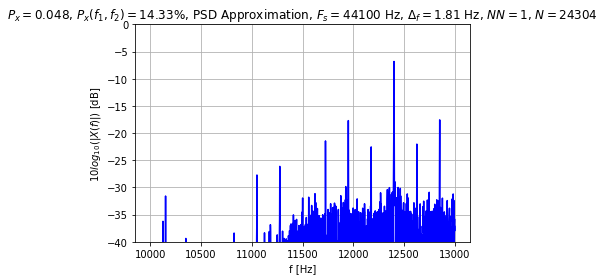

In [642]:
_ , _ = ModuleLab5.showpsd(sig.pwrx(2), [10000, 13000, -40], Fs)

(array([526.,   5.,   0.,   0.,   0.,   0.,   0.,   0.,  49., 412.]),
 array([0.00123024, 0.08821993, 0.17520963, 0.26219932, 0.34918901,
        0.43617871, 0.5231684 , 0.6101581 , 0.69714779, 0.78413749,
        0.87112718]),
 <BarContainer object of 10 artists>)

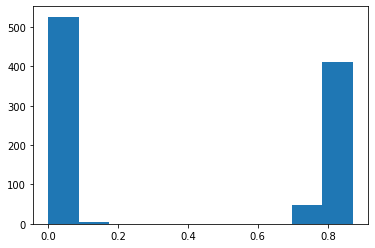

In [648]:
sig_bn,sig_bt,sig_wt,ixn = ModuleLab8.askrcvr(sig, 'noncoh', [6200], [1800, 0.5], 'rect', [])
plt.hist(sig_bn.signal())

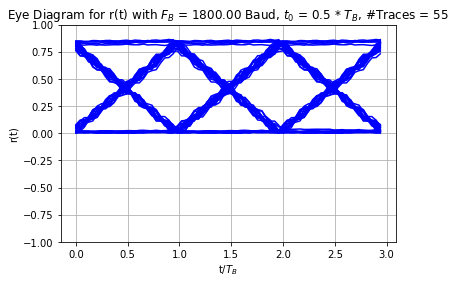

In [649]:
ModuleLab4.showeye(sig_bt, 1800, 55, [0.5, 3, -1, 1])

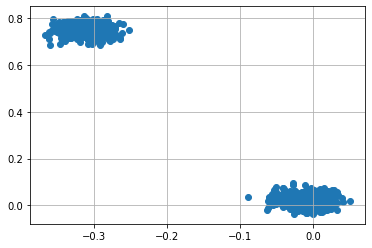

In [650]:
wn = sig_wt.signal()[ixn]
plt.grid()
plt.scatter(wn.real, wn.imag)

O sinal é coerente, mas como há muito pouco ruído, podemos usar a decodificação não-coerente.

In [651]:
sig_bn.signal().size / 8

124.0

Como sabemos que a quantidade de bits transmitda tem que ser múltipla de 8, podemos fazer o fine-tunning de $F_B$ ao escolher valores que façam com que $ \texttt{sig_bn.signal().size} $ seja divisível por 8.

In [652]:
ans = ModuleLab1.bin2asc(np.where(sig_bn.signal() > 0.2, 1, 0), flg = 0)
print(ans)

The United States is number one in cosmetics spending, yet ranked number 23 on the world's "satisfaction with life" ranking.


### asksig803.wav

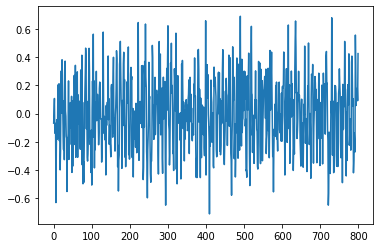

In [653]:
Fs, rt = ModuleLab1.wavread("Files/asksig803.wav")
plt.plot(rt[5000:5000 + 800])
sig = comsig.sigWave(rt, Fs)

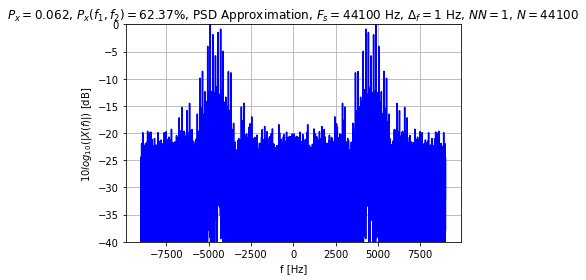

In [654]:
B = 9000
_ , _ = ModuleLab5.showpsd(sig, [-B, B, -40], Fs)

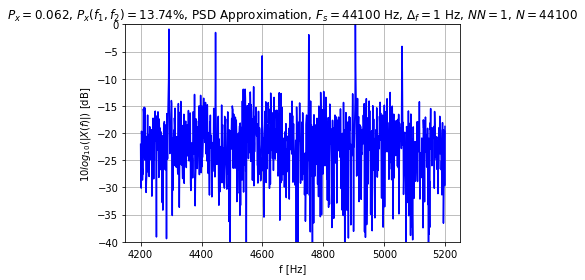

In [655]:
_ , _ = ModuleLab5.showpsd(sig, [4200, 5200, -40], Fs)

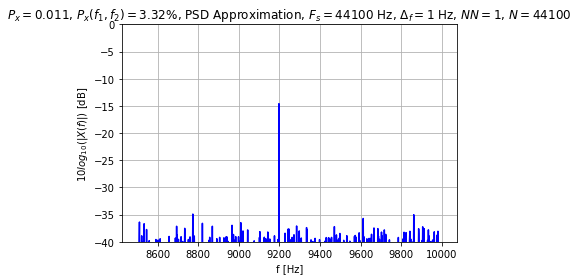

In [656]:
_ , _ = ModuleLab5.showpsd(sig.pwrx(2), [8500, 10000, -40], Fs)

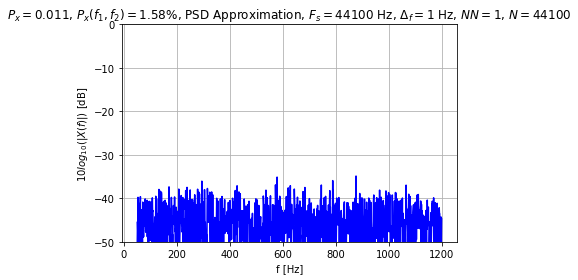

In [657]:
_ , _ = ModuleLab5.showpsd(sig.pwrx(2), [50, 1200, -50], Fs)

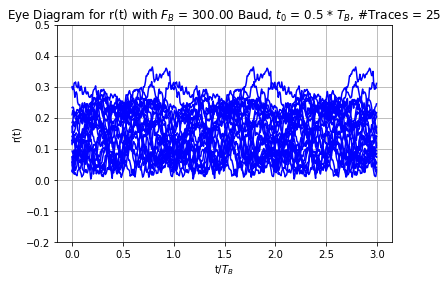

In [665]:
sig_bn, sig_bt, sig_wt, ixn = ModuleLab8.askrcvr(sig, 'noncoh', [4600], [900, 0.0], 'rect', [])
ModuleLab4.showeye(sig_bt, 300, 25, [0.5, 3, -0.2, 0.5])

-1.0 900


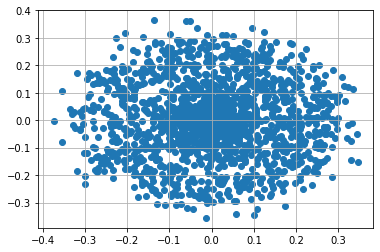

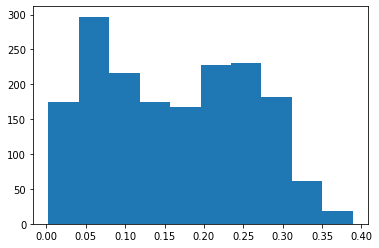

y5Ia&³W[÷Á÷êbî;VOsøõ¿1HÕ¦Á!»îk!zTË¶áþjê¢Qü]¡6,­¾zzSìEÝãyæ&þç?ÕÔ÷p÷{¢.æîÔ:GôUWéçìM¡Ñ\;Éø¹blªô
1uÁò¯rXì27Éµµ
}Fëê©º^wD]¬>7D´¨½;ÕÔ×Mì£©Í>óôm~ãê¹b
Êe¶ÙL¨|nÄ©°èà{poó
P§ÍÈz6JJõfX©É9B[J°÷DDtîÐ·N-BÖÇeÖØôÀÊ7³ôNFÄÁ¥°ò¹dVEða¡»¢SÁÈ»yKWBÄ*+(²`\Vùs2ÁfF
-0.9 900


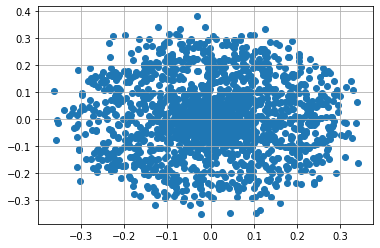

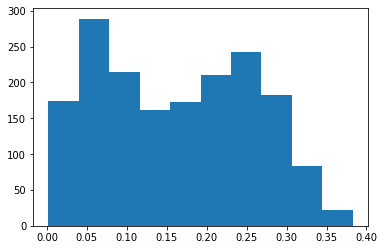

{µªYa'³UóA÷êbîÓ3VOS¯xõ?1ÌÜ¦B1»în!;É¶éþjî¢Qü]¡¶,­¾zxSìmí£oyö&þÇ7Õä÷rçz¢.æîT:GðUGé§üM¡ÑM;Éð9bhªÕ1wÁârXÌ35È´µ
¬¾7f¦¬¨õ;ÕÖ×Íì£«VÌ>sñe~ãê1v?5LMzª±©3/ýO
JU¦ØLªä|,Ì©°ü¬è{Pgó
ÀÎ3#Y½ÎDsÞÄë6In]®¢^IæÓRAeê¬r\	Ù8È*]Ñ«Å¸ª¸uXwj²^.²üÄ6ÆU*ìôÎ>p§3ÌÊz7KJõfX©Í9ÂJJ°öTÄt®°³Nm@ÖÅeÖØäÀÊ³²UNVÌÐg°òeTEðá »òSAÈYSW
Ä*)(2`\T©s3ÁeÎ
-0.8 900


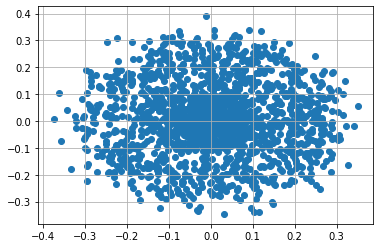

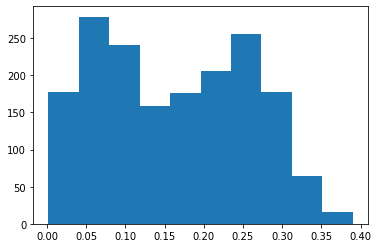

s·¨YuG±u{A÷êbþÒ3TOÓ7¤¦x÷?9ÌX¦B1în!;é¦éÞjî¢Pý]±´¹,µ¾úxUWìiì«mytÞÇwÑäõrçz¶&æîT:EøUgé¯ÕüM±ÐM«;Êâ)âx®ÕK16ÁdvxÎ35ÅÚ´±w
\f«èëú_wm-´¾'f&½¬Õ3ÕÆÇÏn¢¢VÝ>wñe~ëê!v
HW¦¸Nä}-Ì«°ü,È[YgÀÆ3§Y½ÎdóÞÄâYn!]¯¢NKFÓJAeª¨rTù!8.
IÙ«ÅºªuPw*²N/²TÄ5ÖQ*ì´ÎÉ>t1ÌÊ:%KNõfp©Ì©ÂJJöVÄt®°³N}@ÖéEÖ¦ÂÂ³²UNRÐg°ò£eTôá ÒKAØÙBS*Ì*980`]]©"sÁeÞ
-0.7000000000000001 900


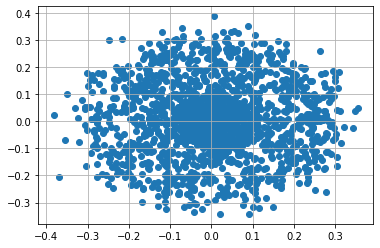

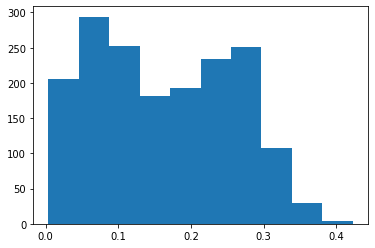

Þn¢èãú_7i-´¾'æ&=ÔsÔÆÇÏn²2VÝ<wñuº~«ê!té¦ëÞjîPõ±´©.¶»xUìiì­«mùtÚÇvÐìýâç{¶&ÆÏTzExgé¯Uõ]±TMª;â+âx.ÕK1>cdÛvxÆsuÅÒ¼¹÷¹VsW=µµ}/	©é3âUOL}±ª¿)º)eGQ==Lhªµ¬qo}_
ÍIW§¸Jäy-ãðô,ÈYYg¢HÀÆ3 §Q½Ìdó±ÎÄæYî!m¯
âNKVÑjIeDªøRTé%8/IÙ90«ºjuPvª
¢N«²UÄuÔÑ*ì´ÎÁ$9:-CuFð©¨ÂJJÐöVÌtª°³NU@ÖiEÖ¸®ÂÂ³rUJSw ò!e]ôå ÈÒKAØÙÂz++980`MÍ©"kÃETÞ
-0.6000000000000001 900


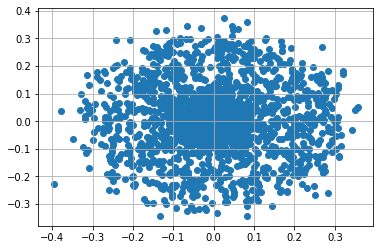

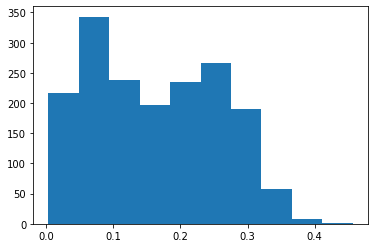

2¾¨XuGµu{bçê`þÆÒSÓ'¦¦¸}U¶:_zªb2]þL1;í¦jQÞjþPõ5±´«.Õ¶»xU%üiî­ª-útÚ×VÂéý¢ïû4ÂÏU{z§gù«Tõ]ñTOª;âkázlÑO0>cdÛtiÖSuÄÒü¹ç¹OvsW=µ·ß/	©é3ãÓUOL}±ª¿!ª	eGQ}8Lhª¬UO¨m_Þê¢éãòZ_7i-´¾'æ&=ÔsÔÎnß¶2VÝ<uñuº~ªîct
ÍAW§¸Jä9-¬âèô,ØYYGªIÅs UÍd¢³ÎÄæY®!i¯
ÊNKTÑ*IåDªÚRUÒé%(©=]Ëù=0ªúXuTz«
ü¥ ÈÒKAØÙÂz++1xp IÍ©"kÃEUÂJH ÐöVÌ,ª°³NU@ÞiUö¸®Ç³pUjSª°W r!e]
-0.5000000000000001 900


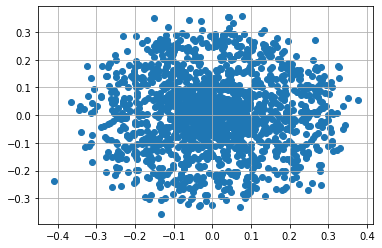

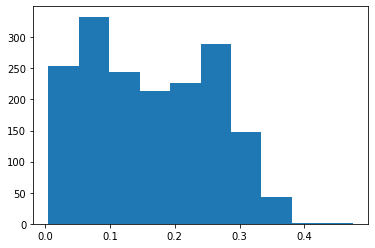

2¾íPu×µu{bçb`þÆÖWÛ'æ¦¸}U¶:ßzb2]ü<1;9í®jXÿhüPõ7±µ«®Ô>»9U%üéî©ª-ºtÚ×VÊéùªï»4ROU{-z§§ù+TõUðDª;ªâk¡rlÑO°:bdÓtiVSuÀòø»ç¹_rsW=õ÷ß/	©éQáÓUOÌ}ª¾"ª	uGQ]8L¯èªÕUO¨m_ÞêÚ²íãðZ_7i,´¾'æ&=ÜSÄî­®nß¶6VÕ<tûõº~ªîBô
ÍA¯(Jà9)¨æèô$ØYGªIÅk uÍ`¢ÃÎÄÆQ§ k¯
ÈNJTQ+ÁåDÆªÚVUÒEé%(©5UDËù­°ªÒXXuÔz«
DwF ¨Â.ø°OÅ,©¬?
 ÐöV®,ª°3nUAÝaUö¸®¢Ç³PU*sª°W r!%Mì¥ ÈÓKAØÙÂz#¬;RQ IÉ©*kÃ
EU½
-0.40000000000000013 900


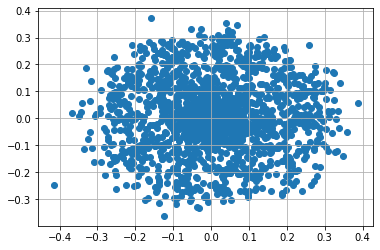

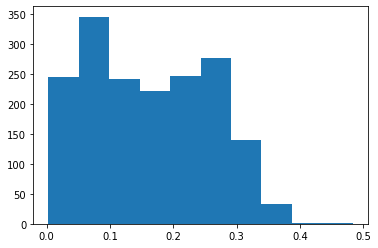

AssertionError: 

In [592]:
FB = 900
for dly in np.arange(-1, 1, 0.1):
    sig_bn, sig_bt, sig_wt, ixn = ModuleLab8.askrcvr(sig, 'noncoh', [4600], [FB, dly], 'rcf', [10, 0.3])
    print(dly, FB)
    wn = sig_wt.signal()[ixn]
    plt.grid()
    plt.scatter(wn.real, wn.imag)
    plt.show()
    plt.hist(sig_bn.signal())
    plt.show()
    TH = 0.18
    ans = ModuleLab1.bin2asc(np.where(sig_bn.signal() > TH, 0, 1), flg = 0)
    print(ans)
    ans = ModuleLab1.bin2asc(np.where(sig_bn.signal() < TH, 0, 1), flg = 0)
    print(ans)

900


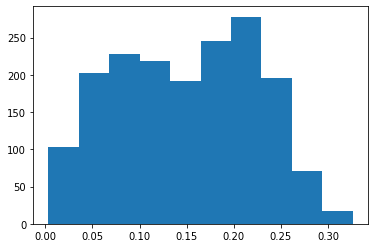

In [582]:
for FB in np.arange(450, 450 * 5 + 1, 450):
    sig_bn, sig_bt, sig_wt, ixn = ModuleLab8.askrcvr(sig, 'noncoh', [4600], [FB, -1], 'rect', [])
    if sig_bn.signal().size % 8 == 0:
        print(FB)
        plt.hist(sig_bn.signal())
        plt.show()

In [427]:
%%time
for dly in np.arange(0, 1, 0.1):
    for FB in np.arange(1750, 1900, 10):
        for TH in np.arange(0, 0.7, 0.01):
            sig_bn, sig_bt, sig_wt, ixn = ModuleLab8.askrcvr(sig, 'noncoh', [4600], [FB, dly], 'rect', [])
            if sig_bn.signal().size % 8 != 0:
                continue
            ans = ModuleLab1.bin2asc(np.where(sig_bn.signal() > TH, 0, 1), flg = 0)
            if ModuleLab1.check_sensible_string(ans):
                print(ans)
            ans = ModuleLab1.bin2asc(np.where(sig_bn.signal() < TH, 0, 1), flg = 0)
            if ModuleLab1.check_sensible_string(ans):
                print(ans)
    print(f"Checked for dly: {dly}")

Checked for dly: 0.0
Checked for dly: 0.1
Checked for dly: 0.2
Checked for dly: 0.30000000000000004
Checked for dly: 0.4
Checked for dly: 0.5
Checked for dly: 0.6000000000000001
Checked for dly: 0.7000000000000001
Checked for dly: 0.8
Checked for dly: 0.9
CPU times: user 31.9 s, sys: 11.2 ms, total: 31.9 s
Wall time: 32 s


In [429]:
%%time
for dly in np.arange(0, 1, 0.1):
    for FB in np.arange(1750, 1900, 10):
        for TH in np.arange(0, 0.7, 0.01):
            sig_bn, sig_bt, sig_wt, ixn = ModuleLab8.askrcvr(sig, 'coh', [4600, 60], [FB, dly], 'rect', [])
            if sig_bn.signal().size % 8 != 0:
                continue
            ans = ModuleLab1.bin2asc(np.where(sig_bn.signal() > TH, 0, 1), flg = 0)
            if ModuleLab1.check_sensible_string(ans):
                print(ans)
            ans = ModuleLab1.bin2asc(np.where(sig_bn.signal() < TH, 0, 1), flg = 0)
            if ModuleLab1.check_sensible_string(ans):
                print(ans)
    print(f"Checked for dly: {dly}")

Checked for dly: 0.0
Checked for dly: 0.1
Checked for dly: 0.2
Checked for dly: 0.30000000000000004
Checked for dly: 0.4
Checked for dly: 0.5
Checked for dly: 0.6000000000000001
Checked for dly: 0.7000000000000001
Checked for dly: 0.8
Checked for dly: 0.9
CPU times: user 14.6 s, sys: 0 ns, total: 14.6 s
Wall time: 14.7 s


In [401]:
sig_bn.signal().size / 8

124.0

(array([267.,  33., 126.,  43.,   1.,   4.,  69., 154., 242.,  53.]),
 array([0.00090876, 0.03400211, 0.06709546, 0.10018881, 0.13328216,
        0.16637551, 0.19946886, 0.23256221, 0.26565556, 0.29874891,
        0.33184226]),
 <BarContainer object of 10 artists>)

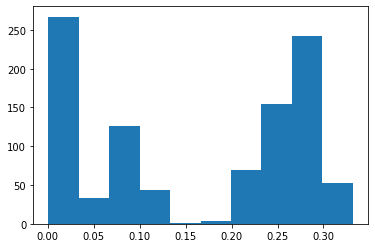

In [402]:
plt.hist(sig_bn.signal())

In [403]:
ans = ModuleLab1.bin2asc(np.where(sig_bn.signal() > TH, 0, 1), flg = 0)
print(ans)
ans = ModuleLab1.bin2asc(np.where(sig_bn.signal() < TH, 0, 1), flg = 0)
print(ans)

#¨O&¢1¨©O1®1(µO"µÏ&0¤,¨´O§&¨O¢¦O-'5$¨1"-µOµ7¨¦)¢&«ÅO:¨±Ï4®&!¨©Ï&0¤,¨´ÏTÕO§¦Ï±#¨O3§´¥)KµÏL5®1"µ*.­1"§¦O3¢±£Ï%¢*¨ÌÏ4®&!¢&«Æ
~ÜW°Ù]ÎWV°zÎQÎ×J°ÝJ0ÙÏ[ÓWK°XÙW°]Y°ÒØÊÛWÎÝÒJ°JÈWYÖ]ÙT:°ÅWN0ËQÙÞWV0ÙÏ[ÓWK0«*°XY0NÜW°ÌXKZÖ´J0³ÊQÎÝJÕÑRÎÝXY°Ì]N\0Ú]ÕW30ËQÙÞ]ÙT9
